<h1>Hnadling Missing numerical Data</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=50)

In [7]:
X_train.shape , Y_train.shape

((712, 3), (712,))

In [9]:
X_test.shape , Y_test.shape

((179, 3), (179,))

In [10]:
X_train.isnull().mean()

Age       0.205056
Fare      0.049157
Family    0.000000
dtype: float64

In [11]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [12]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [13]:
X_train.sample(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
58,5.0,27.7500,3,5.000000,5.0,27.7500,27.7500
650,NaN,7.8958,0,30.236608,29.0,7.8958,7.8958
501,21.0,7.7500,0,21.000000,21.0,7.7500,7.7500
54,65.0,61.9792,1,65.000000,65.0,61.9792,61.9792
199,24.0,13.0000,0,24.000000,24.0,13.0000,13.0000
453,49.0,89.1042,1,49.000000,49.0,89.1042,89.1042
186,NaN,15.5000,1,30.236608,29.0,15.5000,15.5000
309,30.0,56.9292,0,30.000000,30.0,56.9292,56.9292
375,NaN,82.1708,1,30.236608,29.0,82.1708,82.1708
285,33.0,8.6625,0,33.000000,33.0,8.6625,8.6625


In [14]:
print('Original Age column variance : ',X_train['Age'].var())
print('Age column variance after mean imputation : ',X_train['Age_mean'].var())
print('Age column variance after median imputation : ',X_train['Age_median'].var())

print('Original Fare column variance : ',X_train['Fare'].var())
print('Fare column variance after mean imputation : ',X_train['Fare_mean'].var())
print('Fare column variance after median imputation : ',X_train['Fare_median'].var())

Original Age column variance :  209.3580097113731
Age column variance after mean imputation :  166.3674760716256
Age column variance after median imputation :  166.617098519256
Original Fare column variance :  2515.2799606070753
Fare column variance after mean imputation :  2391.4616784393575
Fare column variance after median imputation :  2406.9533047682926


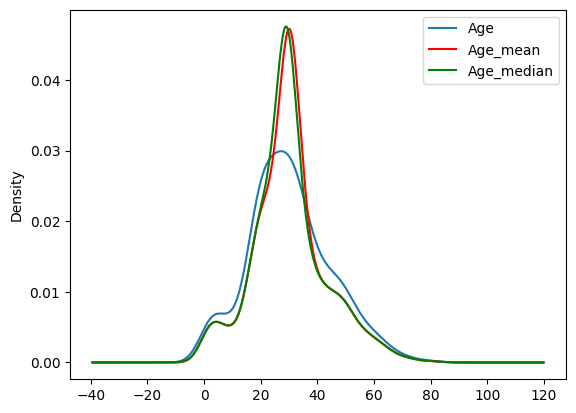

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original age distribution
X_train['Age'].plot(kind='kde' , ax=ax)

# age distribution after mean imputation
X_train['Age_mean'].plot(kind='kde' , ax=ax , color='red')

#age distribution after median imputation
X_train['Age_median'].plot(kind='kde' , ax=ax , color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc='best')

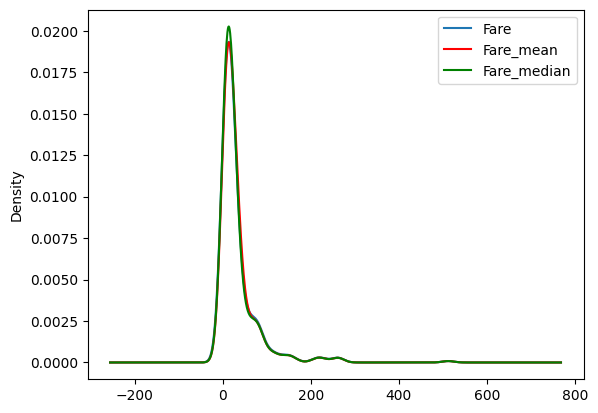

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original Fare distribution
X_train['Fare'].plot(kind='kde' , ax=ax)

# Fare distribution after mean imputation
X_train['Fare_mean'].plot(kind='kde' , ax=ax , color='red')

#Fare distribution after median imputation
X_train['Fare_median'].plot(kind='kde' , ax=ax , color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc='best')

In [17]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,209.358010,87.895684,-6.442801,209.358010,209.358010,83.254567,83.458976
Fare,87.895684,2515.279961,17.850997,69.584069,71.845184,2515.279961,2515.279961
Family,-6.442801,17.850997,2.602751,-5.119807,-5.084699,16.972256,16.971466
Age_mean,209.358010,69.584069,-5.119807,166.367476,166.367476,66.158693,66.321127
Age_median,209.358010,71.845184,-5.084699,166.367476,166.617099,68.308501,68.402053
Fare_mean,83.254567,2515.279961,16.972256,66.158693,68.308501,2391.461678,2391.461678
Fare_median,83.458976,2515.279961,16.971466,66.321127,68.402053,2391.461678,2406.953305


In [19]:
X_train.corr()


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.113162,-0.303094,1.000000,1.000000,0.110993,0.110837
Fare,0.113162,1.000000,0.218185,0.106964,0.110355,1.000000,1.000000
Family,-0.303094,0.218185,1.000000,-0.246038,-0.244168,0.215125,0.214422
Age_mean,1.000000,0.106964,-0.246038,1.000000,0.999251,0.104887,0.104805
Age_median,1.000000,0.110355,-0.244168,0.999251,1.000000,0.108214,0.108013
Fare_mean,0.110993,1.000000,0.215125,0.104887,0.108214,1.000000,0.996777
Fare_median,0.110837,1.000000,0.214422,0.104805,0.108013,0.996777,1.000000


<Axes: >

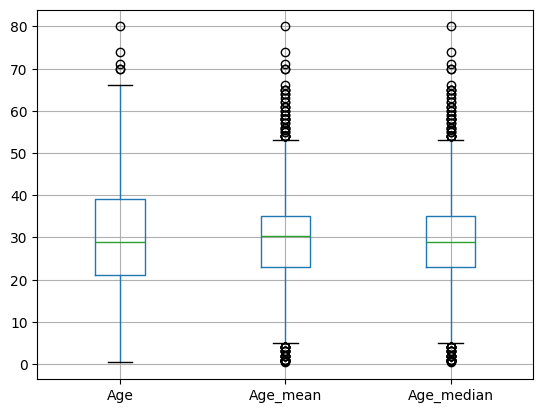

In [20]:
X_train[['Age' , 'Age_mean' , 'Age_median']].boxplot()

<Axes: >

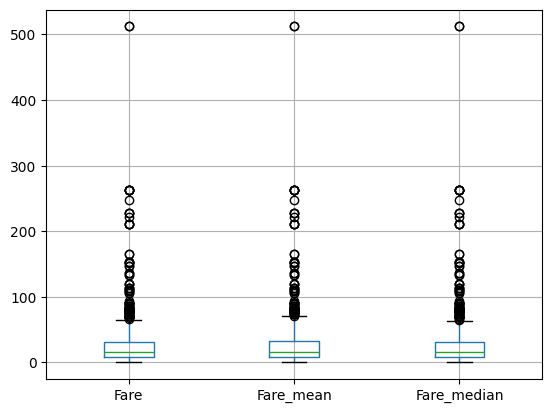

In [21]:
X_train[['Fare' , 'Fare_mean' , 'Fare_median']].boxplot()

In [22]:
#using sklearn
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=50)

In [23]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [24]:
trf = ColumnTransformer([
    ('imputer2',imputer2,['Age']),
    ('imputer1',imputer1,['Fare'])
],remainder='passthrough') 

In [25]:
trf.fit(X_train)

c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer2', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer1', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([29.])

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([33.29260739])

In [30]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [31]:
X_train

array([[29.    , 21.075 ,  4.    ],
       [29.    ,  7.55  ,  0.    ],
       [29.    ,  7.75  ,  0.    ],
       ...,
       [29.    , 24.15  ,  1.    ],
       [ 9.    , 46.9   ,  7.    ],
       [18.    ,  7.7958,  0.    ]])